In this project i will be using the fifa19 dataset to create a linear regression model to predict value. I will be using player attributes as my features. 

In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('fifa19.csv')

I don't want to use goalkeepers in my dataset or use goalkeeping attributes as this is a very different role to other positions on the pitch

In [8]:
df.drop((df[df['Position']=='GK']).index)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
10,10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M
11,11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M


In [9]:
# I only need value and attributes so i will create a new data frame with just these things selected

df = df[['Value','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']]

In [10]:
df.info()
# from this there are some null values left which i need to remove

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 29 columns):
Value              18207 non-null object
Finishing          18159 non-null float64
HeadingAccuracy    18159 non-null float64
ShortPassing       18159 non-null float64
Volleys            18159 non-null float64
Dribbling          18159 non-null float64
Curve              18159 non-null float64
FKAccuracy         18159 non-null float64
LongPassing        18159 non-null float64
BallControl        18159 non-null float64
Acceleration       18159 non-null float64
SprintSpeed        18159 non-null float64
Agility            18159 non-null float64
Reactions          18159 non-null float64
Balance            18159 non-null float64
ShotPower          18159 non-null float64
Jumping            18159 non-null float64
Stamina            18159 non-null float64
Strength           18159 non-null float64
LongShots          18159 non-null float64
Aggression         18159 non-null float64
Intercepti

In [11]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Data columns (total 29 columns):
Value              18159 non-null object
Finishing          18159 non-null float64
HeadingAccuracy    18159 non-null float64
ShortPassing       18159 non-null float64
Volleys            18159 non-null float64
Dribbling          18159 non-null float64
Curve              18159 non-null float64
FKAccuracy         18159 non-null float64
LongPassing        18159 non-null float64
BallControl        18159 non-null float64
Acceleration       18159 non-null float64
SprintSpeed        18159 non-null float64
Agility            18159 non-null float64
Reactions          18159 non-null float64
Balance            18159 non-null float64
ShotPower          18159 non-null float64
Jumping            18159 non-null float64
Stamina            18159 non-null float64
Strength           18159 non-null float64
LongShots          18159 non-null float64
Aggression         18159 non-null float64
Intercepti

In [12]:
#import linear regression and train_test_split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

I stumbled across a problem here with the value column. I was not sure how to convert it from its string to a float. Some of the values were in millions whilst others were in thousands. I split the data using contains and then used a regex to filter out the symbols i did not want. I then converted to a numeric column. After doing this i divided the thousands column to give me the same scale.

In [13]:
# I need to seperate the value column in to millions and thousands, convert to numeric and then multiply by the relevant number
millions = df[df['Value'].str.contains('M')]

thousands = df[df['Value'].str.contains('K')]


millions.head()
thousands.head()

,Value,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
926,€600K,15.0,14.0,23.0,13.0,15.0,12.0,13.0,19.0,25.0,...,14.0,40.0,20.0,12.0,59.0,41.0,59.0,19.0,14.0,15.0
1294,€525K,17.0,10.0,27.0,19.0,18.0,19.0,18.0,26.0,23.0,...,19.0,40.0,19.0,10.0,49.0,20.0,60.0,11.0,12.0,11.0
1625,€900K,23.0,74.0,60.0,19.0,41.0,38.0,29.0,61.0,51.0,...,53.0,80.0,79.0,27.0,41.0,49.0,77.0,82.0,78.0,74.0
1668,€900K,11.0,10.0,25.0,10.0,13.0,11.0,12.0,24.0,23.0,...,14.0,31.0,10.0,12.0,45.0,22.0,60.0,20.0,19.0,17.0
1720,€450K,12.0,13.0,29.0,16.0,11.0,12.0,13.0,20.0,15.0,...,14.0,38.0,23.0,16.0,53.0,13.0,56.0,15.0,11.0,12.0


In [14]:
millions['Value'].replace(regex=True,inplace=True,to_replace=r'[€M]',value=r'')

thousands['Value'].replace(regex=True,inplace=True,to_replace=r'[€K]',value=r'')



C:\Users\jim\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [15]:
millions['Value']=pd.to_numeric(millions['Value'])
thousands['Value'] =pd.to_numeric(thousands['Value'])

C:\Users\jim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
thousands['Value'] = thousands['Value'].apply(lambda x: x/1000)

thousands.head()

C:\Users\jim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Value,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
926,0.600,15.0,14.0,23.0,13.0,15.0,12.0,13.0,19.0,25.0,...,14.0,40.0,20.0,12.0,59.0,41.0,59.0,19.0,14.0,15.0
1294,0.525,17.0,10.0,27.0,19.0,18.0,19.0,18.0,26.0,23.0,...,19.0,40.0,19.0,10.0,49.0,20.0,60.0,11.0,12.0,11.0
1625,0.900,23.0,74.0,60.0,19.0,41.0,38.0,29.0,61.0,51.0,...,53.0,80.0,79.0,27.0,41.0,49.0,77.0,82.0,78.0,74.0
1668,0.900,11.0,10.0,25.0,10.0,13.0,11.0,12.0,24.0,23.0,...,14.0,31.0,10.0,12.0,45.0,22.0,60.0,20.0,19.0,17.0
1720,0.450,12.0,13.0,29.0,16.0,11.0,12.0,13.0,20.0,15.0,...,14.0,38.0,23.0,16.0,53.0,13.0,56.0,15.0,11.0,12.0


I now have the values of players in millions and as numeric values. I need to concat the dataframe vertically to get one joined dataframe.

In [17]:
new_df=pd.concat([millions,thousands])


I converted my Value column in to a log scale and it improved my r score from 0.3 to 0.7 

In [30]:
X = new_df[['Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']]
new_df['Value']= np.log(new_df['Value'])
y=new_df['Value']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

lm = LinearRegression()

In [32]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
print(lm.intercept_)

-8.672739738253874


In [34]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Finishing,0.005443
HeadingAccuracy,-0.001409
ShortPassing,0.018553
Volleys,-0.002684
Dribbling,0.003911
Curve,0.003162
FKAccuracy,-0.003099
LongPassing,-0.002621
BallControl,0.014379
Acceleration,0.008997


In [35]:
predictions = lm.predict(X_test)

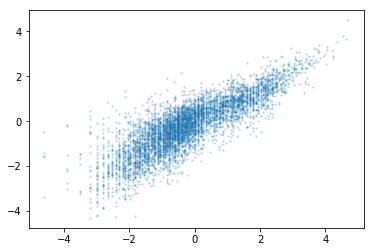

In [48]:
plt.scatter(y_test,predictions,alpha=0.2,s=2)

In [37]:
from sklearn import metrics

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5972851567860695
MSE: 0.5861315438418121
RMSE: 0.7655922830343916


In [39]:
metrics.r2_score(y_test,predictions)

0.7006713281721435